<a href="https://colab.research.google.com/github/CayoCezar/desafio-sql/blob/main/Desafio_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uma empresa sediada em São Paulo que trabalha TI precisa descrever algumas métricas sobre as vendas ocorridas entre 2018 e 2021. O time de BI tem as informações contidas no CSV (Anexar CSV).

* Implemente em python um programa que tenha como entradas o arquivo CSV e realize as seguintes tarefas:

1. * Construa uma tabela auxiliar que sumarize o valor vendido por cada vendedor, ordenando do maior para o menor;

2. * Imprima e identifica qual foi o cliente responsável pela venda com maior valor e com menor valor;

3. * Imprima valor médio por Tipo de venda (Serviços, Licenciamento, Produtos)

4. * Imprima o número de vendas realizada por cliente;



In [ ]:
import pandas as pd

db = pd.read_csv("DB_Teste.csv", sep=';')
db

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Unnamed: 10
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,"R$ 24.800,00",NaN
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,"R$ 302.720,00",NaN
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,"R$ 51.894,86",NaN
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86",NaN
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86",NaN
...,...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,"R$ 273.000,00",NaN
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,"R$ 120.964,32",NaN
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,"R$ 281.880,00",NaN
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,"R$ 720.000,00",NaN


# Atividade 1

Construa uma tabela auxiliar que sumarize o valor vendido por cada vendedor, ordenando do maior para o menor. 


In [ ]:
db.to_csv('dados.csv', index=False)

Criei um outro arquivo para trabalhar e não alterar o original

In [ ]:
dados = pd.read_csv("dados.csv")

In [ ]:
dados


,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Unnamed: 10
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,"R$ 24.800,00",NaN
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,"R$ 302.720,00",NaN
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,"R$ 51.894,86",NaN
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86",NaN
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,"R$ 51.894,86",NaN
...,...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,"R$ 273.000,00",NaN
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,"R$ 120.964,32",NaN
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,"R$ 281.880,00",NaN
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,"R$ 720.000,00",NaN


Observando os tipos de cada coluna para realizar o tratamento adequado

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cliente                      853 non-null    object 
 1   ID                           853 non-null    object 
 2   Tipo                         853 non-null    object 
 3   Data da Venda                853 non-null    object 
 4   Categoria                    853 non-null    object 
 5   Vendedor                     853 non-null    object 
 6   Regional                     853 non-null    object 
 7   Duração do Contrato (Meses)  853 non-null    int64  
 8   Equipe                       853 non-null    object 
 9   Valor                        853 non-null    object 
 10  Unnamed: 10                  0 non-null      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 73.4+ KB


In [ ]:
dados['Valor'] = dados['Valor'].str.replace('R\$', '')

<ipython-input-6-34ade9fb8ec8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dados['Valor'] = dados['Valor'].str.replace('R\$', '')


In [ ]:
dados['Valor'] = dados['Valor'].str.replace(',', '.')

In [ ]:
dados['Valor'] = dados['Valor'].str.replace('.', '')

<ipython-input-8-e8f4b2dd2fee>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['Valor'] = dados['Valor'].str.replace('.', '')


In [ ]:
dados['Valor'] = dados['Valor'].astype(float)

In [ ]:
dados

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Unnamed: 10
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,2480000.0,NaN
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,30272000.0,NaN
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,5189486.0,NaN
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,5189486.0,NaN
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,5189486.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,27300000.0,NaN
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,12096432.0,NaN
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,28188000.0,NaN
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,72000000.0,NaN


Agrupando as duas tabelas e somando seus respectivos valores

In [ ]:
agrupa = dados.groupby('Vendedor')['Valor'].sum()


In [ ]:
agrupa = agrupa.sort_values(ascending=False)
agrupa

Vendedor
Vendedor 3     1.662205e+10
Vendedor 7     5.779918e+09
Vendedor 10    5.221206e+09
Vendedor 8     4.727451e+09
Vendedor 1     3.092948e+09
Vendedor 9     2.637456e+09
Vendedor 13    2.483730e+09
Vendedor 18    2.266230e+09
Vendedor 29    1.907687e+09
Vendedor 4     1.734682e+09
Vendedor 14    7.558042e+08
Vendedor 20    7.520907e+08
Vendedor 19    6.513184e+08
Vendedor 2     5.673761e+08
Vendedor 16    4.879238e+08
Vendedor 6     3.548887e+08
Vendedor 28    3.307138e+08
Vendedor 12    3.019669e+08
Vendedor 22    2.150000e+08
Vendedor 21    1.943240e+08
Vendedor 23    1.941880e+08
Vendedor 11    1.221787e+08
Vendedor 17    1.133803e+08
Vendedor 5     9.139000e+07
Vendedor 24    5.839700e+07
Vendedor 30    5.154468e+07
Vendedor 27    4.200000e+07
Vendedor 26    3.840000e+07
Vendedor 15    8.650461e+06
Vendedor 25    4.053200e+06
Name: Valor, dtype: float64

In [ ]:
agrupa = [ 
['Vendedor 3',    1.662205e+10],
['Vendedor 7',     5.779918e+09],
['Vendedor 10',    5.221206e+09],
['Vendedor 8',     4.727451e+09],
['Vendedor 1',     3.092948e+09],
['Vendedor 9',     2.637456e+09],
['Vendedor 13',    2.483730e+09],
['Vendedor 18',    2.266230e+09],
['Vendedor 29',    1.907687e+09],
['Vendedor 4',     1.734682e+09],
['Vendedor 14',    7.558042e+08],
['Vendedor 20',    7.520907e+08],
['Vendedor 19',    6.513184e+08],
['Vendedor 2',     5.673761e+08],
['Vendedor 16',    4.879238e+08],
['Vendedor 6',     3.548887e+08],
['Vendedor 28',    3.307138e+08],
['Vendedor 12',    3.019669e+08],
['Vendedor 22',    2.150000e+08],
['Vendedor 21',    1.943240e+08],
['Vendedor 23',    1.941880e+08],
['Vendedor 11',    1.221787e+08],
['Vendedor 17',    1.133803e+08],
['Vendedor 5',     9.139000e+07],
['Vendedor 24',    5.839700e+07],
['Vendedor 30',    5.154468e+07],
['Vendedor 27',    4.200000e+07],
['Vendedor 26',    3.840000e+07],
['Vendedor 15',    8.650461e+06],
['Vendedor 25',    4.053200e+06]]

Vendedores = pd.DataFrame(agrupa, columns=['Vendedor', 'Total'])

Vendedores

,Vendedor,Total
0,Vendedor 3,1.662205e+10
1,Vendedor 7,5.779918e+09
2,Vendedor 10,5.221206e+09
3,Vendedor 8,4.727451e+09
4,Vendedor 1,3.092948e+09
5,Vendedor 9,2.637456e+09
6,Vendedor 13,2.483730e+09
7,Vendedor 18,2.266230e+09
8,Vendedor 29,1.907687e+09
9,Vendedor 4,1.734682e+09


Deixando a coluna com outro formato numérico

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

Fiz o plot de um gráfico simples para ajudar na visualização dos dados

<Figure size 1152x432 with 0 Axes>

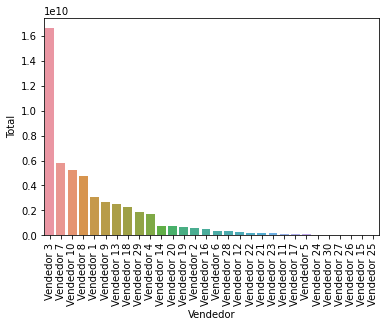

<Figure size 1152x432 with 0 Axes>

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.barplot(x="Vendedor", y="Total", data=Vendedores)
plt.xticks(rotation=90)
plt.figure(figsize=(16, 6))


# Atividade 2

Imprima e identifique qual foi o cliente responsável pela venda com maior valor e com menor valor

In [ ]:
dados

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Unnamed: 10
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,2480000.00,NaN
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,30272000.00,NaN
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,5189486.00,NaN
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,5189486.00,NaN
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,5189486.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,27300000.00,NaN
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,12096432.00,NaN
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,28188000.00,NaN
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,72000000.00,NaN


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cliente                      853 non-null    object 
 1   ID                           853 non-null    object 
 2   Tipo                         853 non-null    object 
 3   Data da Venda                853 non-null    object 
 4   Categoria                    853 non-null    object 
 5   Vendedor                     853 non-null    object 
 6   Regional                     853 non-null    object 
 7   Duração do Contrato (Meses)  853 non-null    int64  
 8   Equipe                       853 non-null    object 
 9   Valor                        853 non-null    float64
 10  Unnamed: 10                  0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 73.4+ KB


Localizando o valor máximo

In [ ]:
dados['Valor'].max()

2497050000.0

Localizando a linha onde esse valor está presente

In [ ]:
dados.loc[dados['Valor']==2497050000.0]

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Unnamed: 10
810,Cliente 89,2020-2073,Produtos,31/01/2020,Novo Logo,Vendedor 7,USA,37,Time 5,2497050000.00,NaN


**Cliente 89 foi o responsável pela venda de maior valor.**

Descobrindo o valor mínimo

In [ ]:
dados['Valor'].min()

125000.0

In [ ]:
dados.loc[dados['Valor']==125000.0]

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Unnamed: 10
86,Cliente 120,2020-3124,Produtos,01/10/2020,Upselling,Vendedor 17,Brasil,24,Time 8,125000.00,NaN


**Cliente 120 foi o responsável pela venda de menor valor.**

# Atividade 3

Imprima valor médio por Tipo de venda (Serviços, Licenciamento, Produtos)

In [ ]:
dados

,Cliente,ID,Tipo,Data da Venda,Categoria,Vendedor,Regional,Duração do Contrato (Meses),Equipe,Valor,Unnamed: 10
0,Cliente 1,2017-0022,Serviços,02/01/2018,Novo Logo,Vendedor 1,Brasil,1,Time 1,2480000.00,NaN
1,Cliente 10,2018-0088,Serviços,14/02/2018,Novo Logo,Vendedor 1,Brasil,6,Time 1,30272000.00,NaN
2,Cliente 10,2018-0104,Serviços,13/03/2018,Upselling,Vendedor 1,Brasil,1,Time 1,5189486.00,NaN
3,Cliente 10,2018-0168,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,5189486.00,NaN
4,Cliente 10,2018-0169,Serviços,30/04/2018,Upselling,Vendedor 1,Brasil,2,Time 1,5189486.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
848,Cliente 96,2020-2928,Serviços,30/10/2020,Cross selling,Vendedor 1,Brasil,14,Time 1,27300000.00,NaN
849,Cliente 96,2021-3613,Produtos,15/03/2021,Upselling,Vendedor 13,Brasil,24,Time 3,12096432.00,NaN
850,Cliente 97,2020-2164,Produtos,07/05/2020,Novo Logo,Vendedor 19,Brasil,39,Time 3,28188000.00,NaN
851,Cliente 98,2020-2285,Produtos,11/05/2020,Novo Logo,Vendedor 19,Brasil,12,Time 3,72000000.00,NaN


Valor médio na categoria de serviços: 

In [ ]:
Serviços = dados.loc[dados['Tipo']=='Serviços']
Serviços['Valor'].mean().round()

31456794.0

Valor médio na categoria de licenciamento:

In [ ]:
Licenciamento = dados.loc[dados['Tipo']=='Licenciamento']
Licenciamento['Valor'].mean().round()

98344877.0

Valor médio na categoria de produtos:

In [ ]:
Produtos = dados.loc[dados['Tipo']=='Produtos']
Produtos['Valor'].mean().round()

89340919.0

# Atividade 4

Imprima o número de vendas realizada por cliente.

In [ ]:
venda_cliente = dados['Cliente'].value_counts()
venda_cliente


Cliente 5      128
Cliente 8       61
Cliente 4       60
Cliente 10      43
Cliente 3       31
              ... 
Cliente 146      1
Cliente 144      1
Cliente 143      1
Cliente 142      1
Cliente 99       1
Name: Cliente, Length: 157, dtype: int64

Testando o algoritmo

In [ ]:
venda_cliente['Cliente 146']

1

In [ ]:
venda_cliente['Cliente 145']

2